In [1]:
import math
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
matplotlib.rcParams['figure.dpi'] = 65

import seaborn as sns
sns.set_context("paper")
sns.set_style("whitegrid", {'grid.linestyle': '--'})

Loading the csv files composing the dataset...

In [2]:
df = pd.read_csv('./dataset/tennis_matches.csv', index_col=0)
mdf = pd.read_csv('./dataset/male_players.csv')
fdf = pd.read_csv('./dataset/female_players.csv')

FileNotFoundError: [Errno 2] No such file or directory: './dataset/tennis_matches.csv'

- `df` is the dataframe containing tournaments, matches and players' info
- `mdf` and `fdf` are, respectively, the list of male and female players

Let's begin!

---

# Data Understanding and Data Preparation (Part I)

## Setting Up the Dataset

First thing first, let's get familiar with the dataset by taking a peek to the first records...

In [ ]:
with pd.option_context('display.max_columns', None):
    display(df.head(10))

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_spectators,tourney_revenue
0,2019-M020,Brisbane,Hard,32.0,A,20181231.0,300.0,105453.0,NaN,Kei Nishikori,R,178.0,JPN,95.000000,106421.0,NaN,Daniil Medvedev,R,198.0,RUS,22.885695,6-4 3-6 6-2,3.0,F,124.0,3.0,3.0,77.0,44.0,31.0,17.0,13.0,3.0,6.0,8.0,6.0,100.0,54.0,34.0,20.0,14.0,10.0,15.0,9.0,3590.0,16.0,1977.0,3928.0,742618.69
1,2019-M020,Brisbane,Hard,32.0,A,20181231.0,299.0,106421.0,NaN,Daniil Medvedev,R,198.0,RUS,22.885695,104542.0,PR,Jo-Wilfried Tsonga,R,188.0,FRA,33.705681,7-6(6) 6-2,3.0,SF,82.0,10.0,1.0,52.0,33.0,28.0,14.0,10.0,0.0,1.0,17.0,2.0,77.0,52.0,36.0,7.0,10.0,10.0,13.0,16.0,1977.0,239.0,200.0,3928.0,742618.69
2,2019-M020,Brisbane,Hard,32.0,A,20181231.0,298.0,105453.0,NaN,Kei Nishikori,R,178.0,JPN,29.004791,104871.0,NaN,Jeremy Chardy,R,188.0,FRA,31.882272,6-2 6-2,3.0,SF,66.0,2.0,2.0,47.0,33.0,26.0,9.0,8.0,2.0,2.0,10.0,3.0,46.0,27.0,15.0,6.0,8.0,1.0,5.0,9.0,3590.0,40.0,1050.0,3928.0,742618.69
3,2019-M020,Brisbane,Hard,32.0,A,20181231.0,297.0,104542.0,PR,Jo-Wilfried Tsonga,R,188.0,FRA,33.705681,200282.0,NaN,Alex De Minaur,R,183.0,AUS,19.868583,6-4 7-6(2),3.0,QF,106.0,12.0,2.0,68.0,43.0,34.0,15.0,11.0,4.0,5.0,1.0,2.0,81.0,60.0,38.0,9.0,11.0,4.0,6.0,239.0,200.0,31.0,1298.0,3928.0,742618.69
4,2019-M020,Brisbane,Hard,32.0,A,20181231.0,296.0,106421.0,NaN,Daniil Medvedev,R,198.0,RUS,22.885695,105683.0,NaN,Milos Raonic,R,196.0,CAN,28.010951,6-7(2) 6-3 6-4,3.0,QF,129.0,12.0,3.0,105.0,68.0,48.0,25.0,16.0,8.0,8.0,29.0,5.0,94.0,56.0,46.0,19.0,15.0,2.0,4.0,16.0,1977.0,18.0,1855.0,3928.0,742618.69
5,2019-M020,Brisbane,Hard,32.0,A,20181231.0,295.0,104871.0,NaN,Jeremy Chardy,R,188.0,FRA,31.882272,106034.0,Q,Yasutaka Uchiyama,R,NaN,JPN,26.403833,6-4 3-6 7-6(4),3.0,QF,127.0,10.0,8.0,94.0,58.0,44.0,18.0,16.0,4.0,8.0,12.0,6.0,90.0,54.0,40.0,18.0,15.0,6.0,9.0,40.0,1050.0,185.0,275.0,3928.0,742618.69
6,2019-M020,Brisbane,Hard,32.0,A,20181231.0,294.0,105453.0,NaN,Kei Nishikori,R,178.0,JPN,29.004791,105777.0,NaN,Grigor Dimitrov,R,188.0,BUL,27.627652,7-5 7-5,3.0,QF,100.0,5.0,2.0,59.0,47.0,37.0,9.0,12.0,0.0,1.0,8.0,5.0,80.0,53.0,37.0,13.0,12.0,6.0,9.0,9.0,3590.0,19.0,1835.0,3928.0,742618.69
7,2019-M020,Brisbane,Hard,32.0,A,20181231.0,293.0,104542.0,PR,Jo-Wilfried Tsonga,R,188.0,FRA,33.705681,106121.0,LL,Taro Daniel,R,NaN,JPN,25.924709,7-6(5) 6-3,3.0,R16,100.0,11.0,3.0,64.0,37.0,30.0,11.0,10.0,4.0,7.0,3.0,7.0,85.0,51.0,34.0,11.0,11.0,6.0,11.0,239.0,200.0,77.0,691.0,3928.0,742618.69
8,2019-M020,Brisbane,Hard,32.0,A,20181231.0,292.0,200282.0,NaN,Alex De Minaur,R,183.0,AUS,19.868583,111442.0,NaN,Jordan Thompson,R,183.0,AUS,24.698152,6-4 6-2,3.0,R16,80.0,1.0,1.0,49.0,38.0,29.0,8.0,9.0,0.0,0.0,5.0,0.0,56.0,39.0,30.0,3.0,9.0,3.0,6.0,31.0,1298.0,72.0,715.0,3928.0,742618.69
9,2019-M020,Brisbane,Hard,32.0,A,20181231.0,291.0,106421.0,NaN,Daniil Medvedev,R,198.0,RUS,22.885695,104918.0,PR,Andy Murray,R,190.0,GBR,31.630390,7-5 6-2,3.0,R16,81.0,16.0,2.0,54.0,34.0,27.0,13.0,10.0,0.0,1.0,6.0,1.0,60.0,39.0,27.0,7.0,10.0,2.0,6.0,16.0,1977.0,240.0,200.0,3928.0,742618.69


In [ ]:
display(mdf.head(10))

,name,surname
0,Gardnar,Mulloy
1,Pancho,Segura
2,Frank,Sedgman
3,Giuseppe,Merlo
4,Richard Pancho,Gonzales
5,Grant,Golden
6,Abe,Segal
7,Kurt,Nielsen
8,Istvan,Gulyas
9,Luis,Ayala


In [ ]:
display(fdf.head(10))

,name,surname
0,Bobby,Riggs
1,X,X
2,Martina,Hingis
3,Mirjana,Lucic
4,Justine,Henin
5,Kerry Anne,Guse
6,Jolene,Watanabe
7,Karina,Habsudova
8,Silvija,Talaja
9,Alicia,Molik


...and by discovering its size

In [ ]:
df.shape

(186128, 49)

In [ ]:
len(mdf)

55208

In [ ]:
len(fdf)

46172

Everything looks fine *(except for the suspicious guy called "X X")*

But what about NULL values? Let's do some math:

* What is the % of NULL values in `df`?

In [ ]:
(df.isna().sum().sum() * 100) / (df.shape[0] * df.shape[1])

29.38339996877286

* Print out some statistics about the number of NULL values in each record of `df`:

In [ ]:
df.isna().sum(axis=1).describe()

count    186128.000000
mean         14.397866
std          10.413034
min           0.000000
25%           3.000000
50%          22.000000
75%          23.000000
max          35.000000
dtype: float64

* What is the $\%$ of NULL values in `mdf` and `fdf`?

In [ ]:
(mdf.isna().sum() * 100) / (mdf.shape[0] * mdf.shape[1])

name       0.160303
surname    0.038038
dtype: float64

In [ ]:
(fdf.isna().sum() * 100) / (fdf.shape[0] * fdf.shape[1])

name       1.805207
surname    0.000000
dtype: float64

And what about duplicated records? Are there any?

* What is the $\%$ of duplicated records in `df`?

In [ ]:
(df.duplicated().sum() * 100) / (df.shape[0])

0.16601478552394053

* What is the $\%$ of duplicated records in `mdf` and `fdf`?

In [ ]:
(mdf.duplicated().sum() * 100) / mdf.shape[0]

0.9491378061150558

In [ ]:
(fdf.duplicated().sum() * 100) / fdf.shape[0]

1.1067313523347484

OK: let's address some of these issues

In [ ]:
df = df.drop_duplicates()

mdf = mdf.drop_duplicates()
mdf = mdf.dropna(axis=0, how='all')

fdf = fdf.drop_duplicates()

## Type Conversion & Domain Check

Prior to any kind of domain check, let's run a quick automatic convertion of `dtype`s

NULL values will be preserved and denoted as `pandas.NA`

In [ ]:
df = df.convert_dtypes()
mdf = mdf.convert_dtypes()
fdf = fdf.convert_dtypes()

Let's see the resulting types:

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.info())
    display(mdf.info())
    display(fdf.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185819 entries, 0 to 186127
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tourney_id          185764 non-null  string 
 1   tourney_name        185794 non-null  string 
 2   surface             185631 non-null  string 
 3   draw_size           185790 non-null  Int64  
 4   tourney_level       185790 non-null  string 
 5   tourney_date        185791 non-null  Int64  
 6   match_num           185792 non-null  Int64  
 7   winner_id           185764 non-null  Int64  
 8   winner_entry        25811 non-null   string 
 9   winner_name         185792 non-null  string 
 10  winner_hand         185773 non-null  string 
 11  winner_ht           49303 non-null   Int64  
 12  winner_ioc          185790 non-null  string 
 13  winner_age          182966 non-null  Float64
 14  loser_id            185791 non-null  Int64  
 15  loser_entry         44088 non-null

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54683 entries, 0 to 55207
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     54559 non-null  string
 1   surname  54683 non-null  string
dtypes: string(2)
memory usage: 1.3 MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45661 entries, 0 to 46171
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     44089 non-null  string
 1   surname  45661 non-null  string
dtypes: string(2)
memory usage: 1.0 MB


None

Most of the types seem to be correct now. However, we would like to convert the `tourney_date` and `minutes` features to more appropriate types:

In [ ]:
df["tourney_date"] = pd.to_datetime(df["tourney_date"], format="%Y%m%d", errors="coerce")
df["minutes"] = pd.to_timedelta(df["minutes"], unit="minutes")

Done!

One simple thing we can already check, is whether there exist any entry of categorical attributes that do not belong to the domain, i.e. having a syntactical error:

* `surface` of the tennis court

In [ ]:
df["surface"].unique()

<StringArray>
['Hard', 'Clay', 'Grass', 'Carpet', <NA>]
Length: 5, dtype: string

* `tourney_level`

In [ ]:
df["tourney_level"].unique()
# (WTA250 >= 2021) == (International 2009-2020) == (T3, T4, T5 1990-2008)
# (WTA500 >= 2021) == (Premier 2009-2020) == (T2 1990-2008)
# (WTA1000 >= 2021) == (Premier Mandatory 2009-2020) == (T1 1990-2008)
# O == Olympics

<StringArray>
[  'A',   'P',   'G',   'I',   'M',  'PM',   'F',   'D',   'C',  '15',  '25',
  '60', '100',  '80',  '10',  '50',  '75',   'O',   'W',  <NA>]
Length: 20, dtype: string

- `winner_entry` and `loser_entry`

In [ ]:
display(df["winner_entry"].value_counts())
display(df["loser_entry"].value_counts())

Q      13575
WC      8306
LL       962
SE       746
PR       455
Alt      434
ITF      305
IR       253
ALT      234
SR       212
JR       153
JE       132
P         24
A         19
I          1
Name: winner_entry, dtype: Int64

Q      20346
WC     17940
LL      2170
Alt      839
SE       595
PR       519
ITF      424
ALT      378
IR       347
SR       215
JE       116
JR       101
A         65
P         28
4          1
6          1
3          1
I          1
J          1
Name: loser_entry, dtype: Int64

Both of them have the entry type "ALT" splitted into "Alt": let's merge them into a single "ALT" entry

In [ ]:
df["winner_entry"] = df["winner_entry"].str.replace("Alt", "ALT")
df["loser_entry"] = df["loser_entry"].str.replace("Alt", "ALT")

- `winner_hand` and `loser_hand`

In [ ]:
display(df["winner_hand"].unique())
display(df["loser_hand"].unique())

<StringArray>
['R', 'L', 'U', <NA>]
Length: 4, dtype: string

<StringArray>
['R', 'L', 'U', <NA>]
Length: 4, dtype: string

The "U" entries are missing values just like `pandas.NA`s: let's convert them

In [ ]:
df['winner_hand'] = df['winner_hand'].replace(to_replace='U', value=np.nan)
df['loser_hand'] = df['loser_hand'].replace(to_replace='U', value=np.nan)

- `round` of the match

In [ ]:
df["round"].unique()

<StringArray>
[   'F',   'SF',   'QF',  'R16',  'R32',   'Q1',   'Q2',   'Q3',  'R64',
 'R128',   'RR',   'BR',   <NA>]
Length: 13, dtype: string

We note that "Q1", "Q2", "Q3" and "R32", "R64", "R124" both denote the same tournament phases, but in a different format: let's unify them

In [ ]:
df["round"] = df["round"].replace({"R16": "Q1", "R32": "Q2", "R64": "Q3", "R128": "Q4"})

## Some Initial Statistics

Define a Sturge's rule function that computes an appropriate number of bins for histogram plots. It will come in handy later on:

In [ ]:
def sturgesBins(n):
    return math.ceil(math.log(n) + 1)

#### Annual matches distribution

In which years and months of the year do we have the most matches in the dataset?

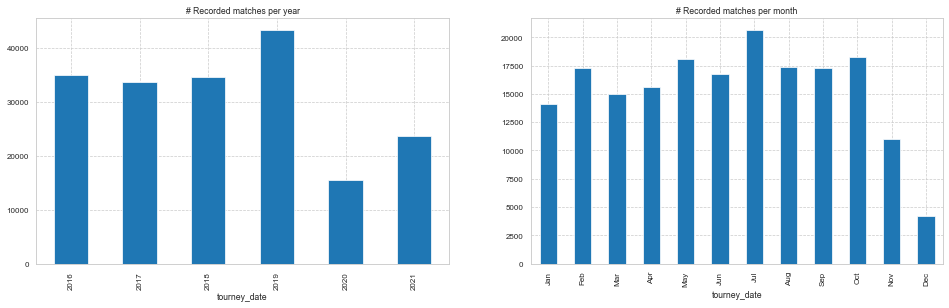

In [ ]:
tourneyDates = pd.to_datetime(df["tourney_date"], format="%Y%m%d", errors="coerce")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

tourneyDates.groupby(tourneyDates.dt.year).count().plot(
    kind="bar",
    title="# Recorded matches per year",
    ax=axes[0]
)
axes[0].set_xticklabels(["2016", "2017", "2018", "2019", "2020", "2021"])


tourneyDates.groupby(tourneyDates.dt.month).count().plot(
    kind="bar",
    title="# Recorded matches per month",
    ax=axes[1]
)
axes[1].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
pass

The number of matches recorded in the dataset per year appears to be more or less stationary between
$2016$ and $2019$. There is a drastic decrease in the year $2020$ that intuitively correspond to the enactment of the first major social distancing measures to address the COVID-19 pandemic

The dataset also seems to be balanced in terms of number of matches recorded per month, in that it appears to be in line with the typical annual schedule of tournaments

Let's have a view of the entire period during which matches contained in the dataset were recorded:

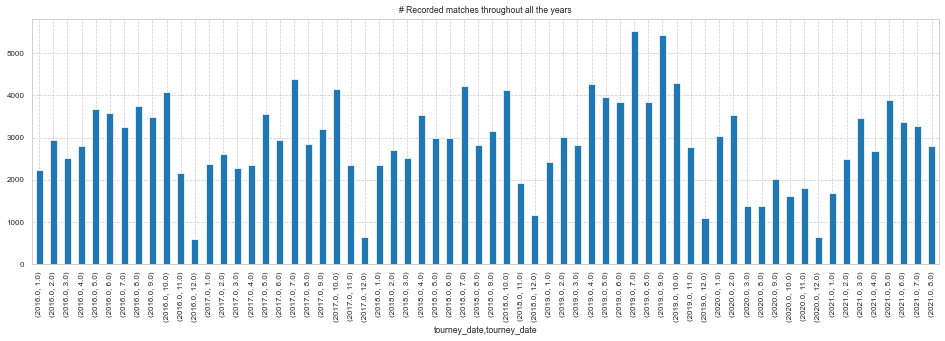

In [ ]:
tourneyDates.groupby([tourneyDates.dt.year, tourneyDates.dt.month]).count().plot(
    kind="bar",
    title="# Recorded matches throughout all the years",
    figsize=(18, 5)
)
pass

The COVID-19 pandemic affected the year 2021 too, although an inferior number of matches is to be expected due to the dataset being formed of matches prior to September 2021

#### Tournaments' IDs and Names

How many `tourney_id`s is a single `tourney_name` typically divided into?

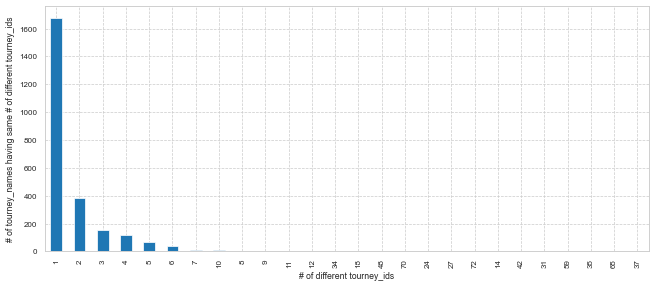

In [ ]:
df.groupby("tourney_name")["tourney_id"].nunique().value_counts().plot(
    kind='bar',
    ylabel='# of tourney_names having same # of different tourney_ids',
    xlabel='# of different tourney_ids',
    figsize=(12, 5)
)
pass

The majority of tournaments' names seem to have a single IDs associated with... what is happening? Let's dive into the `tourney_level` of those tourneys:

/var/folders/14/m5d2mhn11ng4g273c71d4vg40000gn/T/ipykernel_32522/2376544201.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  levels = df2[df.tourney_name.isin(tmp[tmp == 1].index)].tourney_level.value_counts()


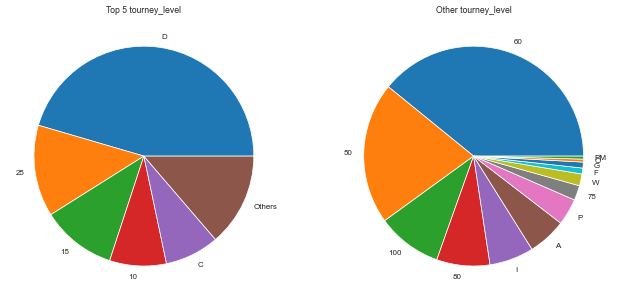

In [ ]:
tmp = df.groupby("tourney_name")["tourney_id"].nunique()
df2 = df[["tourney_name", "tourney_id", "tourney_level"]].drop_duplicates()
levels = df2[df.tourney_name.isin(tmp[tmp == 1].index)].tourney_level.value_counts()

otherLevels = levels.iloc[5:]
top5Levels = levels.iloc[:5].append(pd.Series(data=otherLevels.sum(), index=["Others"]))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
top5Levels.rename("").plot(
    kind='pie',
    ax = axes[0],
    title="Top 5 tourney_level"
)
otherLevels.rename("").plot(
    kind='pie',
    ax = axes[1],
    title="Other tourney_level"
)
pass

Most tournaments have a single ID not because they only had one edition, but rather because they are national tournaments (same cup, but different `tourney_name`s each time different nations face each other).

#### Tennis court surfaces

Let's count and compare the amount of tournaments played on each type of surface:

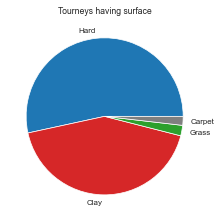

In [ ]:
df[["tourney_id", "surface"]].drop_duplicates().value_counts("surface").rename("").plot(
    kind='pie',
    title='Tourneys having surface',
    colormap=ListedColormap([sns.color_palette()[0], sns.color_palette()[3], sns.color_palette()[2], sns.color_palette()[7]])
)
pass

The distribution seems to be OK: carpet courts are sort of deprecated, while grass ones are tipically rare

Let's do the same thing, but differentiating between different `tourney_level`s:

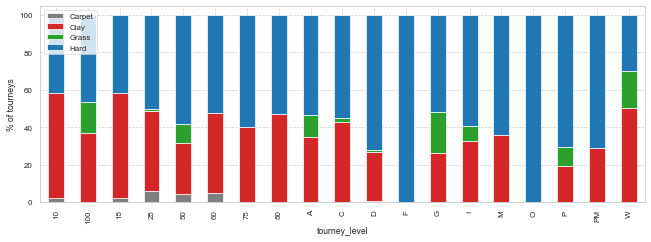

In [34]:
tourneysSurfaces = df[["tourney_id", "tourney_level", "surface"]].drop_duplicates()
tmp = tourneysSurfaces.groupby("tourney_level")["surface"].value_counts(normalize=True) * 100
tmp.sort_index().unstack().plot(
    kind='bar',
    stacked=True,
    ylabel='% of tourneys',
    colormap=ListedColormap([sns.color_palette()[7], sns.color_palette()[3], sns.color_palette()[2], sns.color_palette()[0]]),
    figsize=(12,4)
)
plt.legend(loc='upper left')
plt.savefig("out.png", transparent=True)
pass

Still OK: the dataset does not seem to be biased towards tourneys held on a specific type of court

#### Tournaments' number of partecipants

Overall, how many individual `tourney_id`s are there for every draw_size?

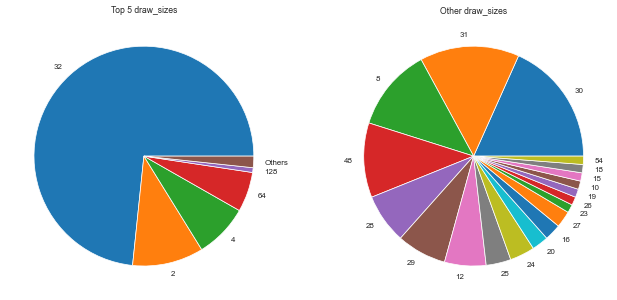

In [35]:
drawSizes = df[["draw_size", "tourney_id"]].drop_duplicates().draw_size.value_counts()
otherDrawSizes = drawSizes.iloc[5:]
top5DrawSizes = drawSizes.iloc[:5].append(pd.Series(data=otherDrawSizes.sum(), index=["Others"]))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
top5DrawSizes.rename("").plot(
    kind='pie',
    ax = axes[0],
    title="Top 5 draw_sizes"
)
otherDrawSizes.rename("").plot(
    kind='pie',
    ax = axes[1],
    title="Other draw_sizes"
)
pass

Plot the distribution of the number of matches in the dataset for each $\langle$`torney_id`, `tourney_level`$\rangle$, differentiating between different `draw_size`s. Analyzing this boxplot (along with the info derived from the pie chart above) may allow us to answer the following question: does the dataset contains all the matches of each tournament?

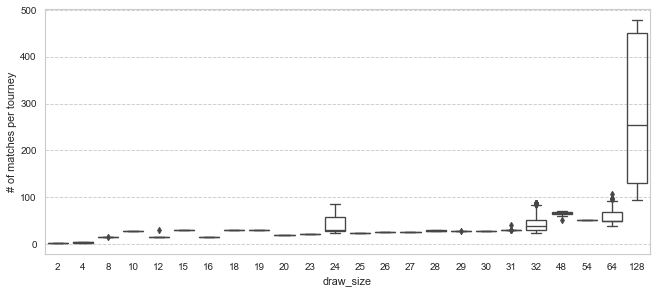

In [36]:
tmp = df.groupby(["draw_size", "tourney_id", "tourney_level"]).size().droplevel(["tourney_id", "tourney_level"]).to_frame("matches").reset_index()
tmp = tmp.convert_dtypes()
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(12,5)})
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.boxplot(
    y="matches",
    x="draw_size",
    boxprops={'facecolor':'None'},
    data=tmp
)
plt.ylabel("# of matches per tourney")
plt.minorticks_on()

Answering the previous question did not turn out to be an easy task. In fact, we note that:
- the dataset may contains qualification matches between players not counted in `draw_size`, especially in the case of large tournaments
- some players may face each other multiple times, like in the Davis Cup
- some `tourney_id`s have a `draw_size` that does not distinguish between male and female partecipants

these observation may also occur toghether

#### Tournaments' spectators and revenue

Let's compute the Pearson correlation between `tourney_spectators` and `tourney_revenue`:

In [37]:
df[["tourney_id", "tourney_revenue", "tourney_spectators"]].drop_duplicates().dropna().corr()

,tourney_revenue,tourney_spectators
tourney_revenue,1.000000,0.940156
tourney_spectators,0.940156,1.000000


The two features reasonably appear to be highly correlated! Let's plot a scatter matrix of the two of them and perform a linear regression:

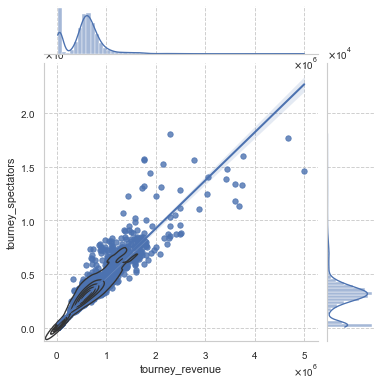

In [38]:
tmp = df[["tourney_id", "tourney_revenue", "tourney_spectators"]].drop_duplicates().dropna()
g = sns.jointplot(
    x=tmp["tourney_revenue"].astype(int),
    y=tmp["tourney_spectators"].astype(int),
    kind='reg',
    marginal_kws=dict(bins=60 ,fill=True),
    height=6)
g.plot_joint(sns.kdeplot, color=".2", zorder=1, levels=6)

g.ax_joint.ticklabel_format(style='scientific', scilimits=(0,0), useMathText=True)

There appear to be some possible outliers; unfortunately, there is no definitive way to tell whether they are generated from erroneous data or not

One thing we can notice however, is that tournaments seem to be subdivided in 2 main categories in terms of revenue and number of spectators, being generated from 2 different normal distributions from a statistical point of view (depicted from the two histograms and by the kernel density estimate plot layered on top of the scatter):

1. tournaments having a revenue $\geq 40000$ and number of spectators $\geq 200$
2. tournaments having a revenue $< 40000$ and number of spectators $< 200$

Moreover, these last ones all seem to be from the Davis Cup:

In [39]:
df[df.tourney_revenue < 40000].value_counts("tourney_level")

tourney_level
D    521
dtype: int64

#### Players info

Although we do not have a clean and reliable list of players yet, we can still create a quick and dirty one just to be able to conduct some preliminary analysis on the information and match statistics related to the players, as to get some first insights about the quality of that data:

In [40]:
winners = df[["winner_id", "winner_name", "winner_hand", "winner_ht", "winner_ioc", "winner_age"]].copy()
winners.columns = ["id", "name", "hand", "ht", "ioc", "age"]
winners.head()
losers = df[["loser_id", "loser_name", "loser_hand", "loser_ht", "loser_ioc", "loser_age"]].copy()
losers.columns = ["id", "name", "hand", "ht", "ioc", "age"]

players = pd.concat([winners, losers]).drop_duplicates()
players = players.dropna(how='any', subset=['id', 'name'])

- How many player entry have unknown (U) handedness? What about the others? Are they mostly right-handed?

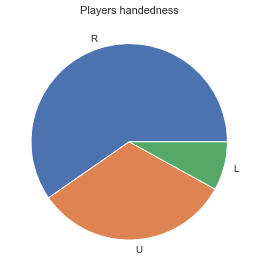

In [41]:
players.hand.fillna('U').value_counts().rename("").plot(
    kind='pie',
    title='Players handedness'    
)
pass

- Is the dataset biased towards matches with players having certain handedness?

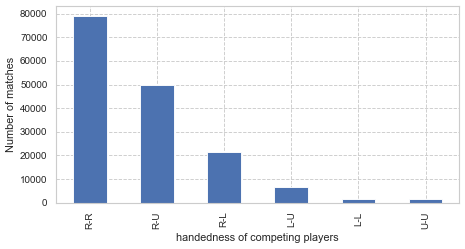

In [42]:
tmp = df[["winner_hand", "loser_hand"]].fillna('U').groupby(["winner_hand", "loser_hand"]).size()
tmpDict = {
    'R-R': tmp.loc["R", "R"],
    'R-L': tmp.loc["R", "L"] + tmp.loc["L", "R"],
    'L-L': tmp.loc["L", "L"],
    'R-U': tmp.loc["R", "U"] + tmp.loc["U", "R"],
    'L-U': tmp.loc["L", "U"] + tmp.loc["U", "L"],
    'U-U': tmp.loc["L", "L"]
}
pd.Series(tmpDict).sort_values(ascending=False).plot(
    kind='bar',
    grid=True,
    xlabel='handedness of competing players',
    ylabel='Number of matches',
    figsize=(8, 4)
)
pass

The number of matches reflects the distribution of players handedness and the number of unknown handedness entries

- We observe the distribution of players' heights, highlighting possible outliers

count    37922.000000
mean       181.528480
std          8.760899
min        157.000000
25%        175.000000
50%        183.000000
75%        188.000000
max        206.000000
Name: ht, dtype: float64

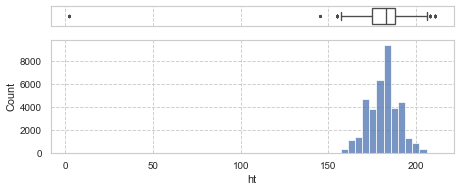

In [43]:
q1 = players.ht.quantile(0.25)
q3 = players.ht.quantile(0.75)
iqr = q3-q1

smallest = players.loc[players.ht > (q1 - 1.5 * iqr), "ht"].sort_values().iloc[0]
largest = players.loc[players.ht < (q3 + 1.5 * iqr), "ht"].sort_values(ascending=False).iloc[0]

htInWhiskers = players.loc[(players.ht >= smallest) & (players.ht <= largest), "ht"]
display(htInWhiskers.describe())

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(8, 3))
 
sns.boxplot(data=players, x="ht", fliersize=2, boxprops={'facecolor':'None'}, ax=ax_box)
sns.histplot(data=htInWhiskers, bins=sturgesBins(htInWhiskers.size), ax=ax_hist)
 
ax_box.set(xlabel='')
pass

There appear to be some outliers; in particular, the height entry that has 2 cm certainly represents an incorrect data

- We observe the distribution of players' ages, highlighting possible outliers

count    178069.000000
mean         23.596181
std           4.442390
min          14.006845
25%          20.057495
50%          23.110198
75%          26.598220
max          36.602327
Name: age, dtype: float64

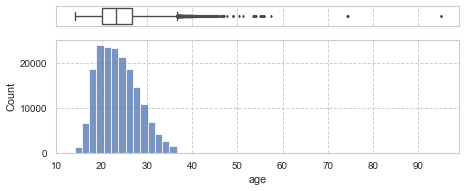

In [44]:
q1 = players.age.quantile(0.25)
q3 = players.age.quantile(0.75)
iqr = q3-q1

smallest = players.loc[players.age > (q1 - 1.5 * iqr), "age"].sort_values().iloc[0]
largest = players.loc[players.age < (q3 + 1.5 * iqr), "age"].sort_values(ascending=False).iloc[0]

ageInWhiskers = players.loc[(players.age >= smallest) & (players.age <= largest), "age"]
display(ageInWhiskers.describe())

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(8, 3))
 
sns.boxplot(data=players, x="age", fliersize=2, boxprops={'facecolor':'None'}, ax=ax_box)
sns.histplot(data=ageInWhiskers, bins=sturgesBins(ageInWhiskers.size), ax=ax_hist)
 
ax_box.set(xlabel='')
pass

Again, there seem to be some outliers and instances of incorrect data

- Plot the nationality of the players

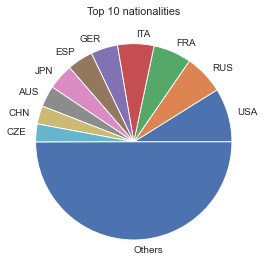

In [45]:
nIocs = players.ioc.value_counts()
otherIocs = nIocs.iloc[10:]
top10Iocs = nIocs.iloc[:10].append(pd.Series(data=otherIocs.sum(), index=["Others"]))

top10Iocs.rename("").plot(
    kind='pie',
    title="Top 10 nationalities"
)
pass

- Search for correlations and possible outliers within players' match statistics

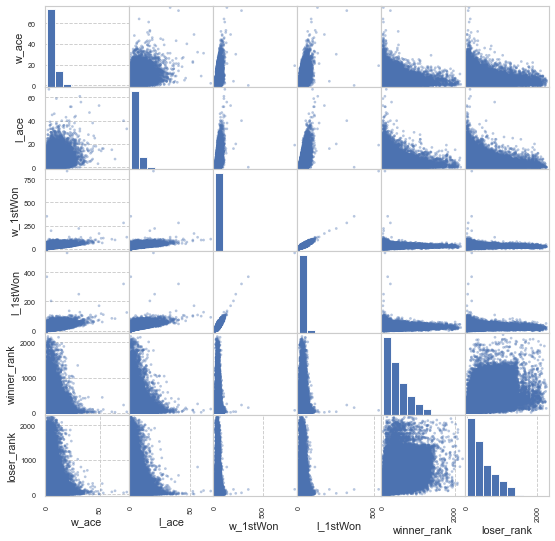

In [46]:
pd.plotting.scatter_matrix(
    df[['w_ace', 'l_ace', 'w_1stWon', 'l_1stWon', 'winner_rank', 'loser_rank']],
    alpha=0.4,
    figsize=(10, 10))
pass

In [47]:
# Seaborn's slower but cooler scatter matrix with kernel density estimate
"""
g = sns.pairplot(
    df[['w_ace', 'l_ace', 'w_1stWon', 'l_1stWon', 'winner_rank', 'loser_rank']],
    diag_kind="kde",
    height=1.25,
    plot_kws=dict(marker="+", linewidth=1),
    corner=True)
g.map_lower(sns.kdeplot, levels=4, color=".2")
"""
pass

As we can see above, the dataset presents outliers for what concerns players stats. We will manage them later, when we will manage the outliers of the entire dataset.
Furthermore, it is interesting to see how the stats regarding performances increase as the ranking decreases (recalling that *lower is better*), for example the number of `w_ace` is on average much higher when `loser_rank` is lower, which can be intuitively proved as *"to beat a better player we have to perform better"*.

#### Correlation

Time to find if there are correlations in the dataset.

In [48]:
corr = df.drop(columns=['winner_id', 'loser_id', 'match_num', 'draw_size', 'winner_rank_points', 'loser_rank_points']).corr()

<AxesSubplot:>

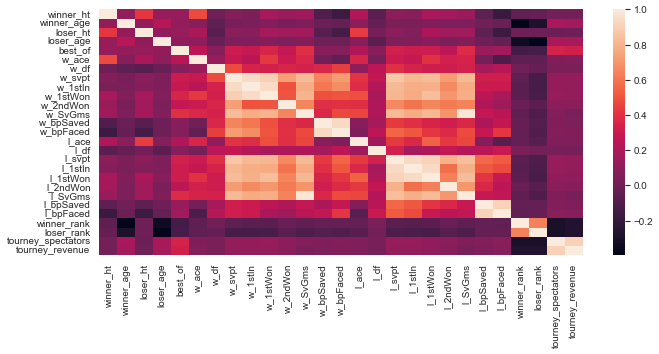

In [49]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

<AxesSubplot:>

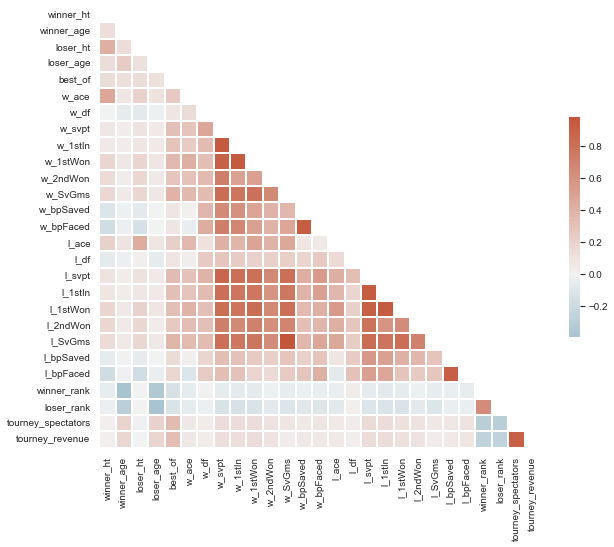

In [50]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In order to perceive a more precise indication from the correlations we will now print the higher, lower and *"most near to 0"* values.

In [51]:
corr_sorted = corr.unstack().sort_values(ascending=False)
corr_sorted = corr_sorted[~corr_sorted.index.isin([(x, x) for x in corr.columns])].drop_duplicates() # removing the diagonal
corr_sorted[:15]

l_SvGms          w_SvGms               0.981296
w_1stIn          w_1stWon              0.942874
                 w_svpt                0.938794
l_1stWon         l_1stIn               0.935940
w_bpSaved        w_bpFaced             0.932504
l_svpt           l_1stIn               0.931920
l_bpSaved        l_bpFaced             0.912404
l_1stWon         l_svpt                0.910691
tourney_revenue  tourney_spectators    0.903195
w_1stWon         w_svpt                0.895880
w_svpt           l_svpt                0.866802
l_svpt           l_SvGms               0.834271
l_1stWon         w_1stWon              0.831447
w_svpt           w_SvGms               0.830070
l_1stWon         l_SvGms               0.824573
dtype: float64

Above we can observe the pairs with highest correlation (without duplicates, in order to remove the correlations $=1$). As a trivial one, we have a correlation $\approx 1$ between `l_SvGms` and `w_SvGms`, since the number of serving games between two players is the same, or one more for the player who started serving.
However, even if there are *really high* correlations, we aren't able to find eventual redundant variables to be eliminated. 

In [52]:
corr_sorted[(corr_sorted > 0.7) & (corr_sorted < 0.8)]

w_1stWon  w_SvGms      0.794528
l_svpt    l_2ndWon     0.787932
w_1stIn   l_1stWon     0.787254
l_SvGms   l_1stIn      0.784043
l_1stIn   w_1stIn      0.781058
w_1stWon  l_SvGms      0.779036
w_SvGms   w_1stIn      0.776393
w_1stWon  l_1stIn      0.769341
w_SvGms   l_1stIn      0.767060
l_SvGms   w_1stIn      0.766402
w_svpt    w_2ndWon     0.722784
          w_bpFaced    0.718705
l_2ndWon  w_svpt       0.718433
dtype: float64

Correlations with an high value of confidence.

In [53]:
corr_sorted[-15:]

loser_rank       w_svpt               -0.133646
w_1stIn          loser_rank           -0.137152
best_of          winner_rank          -0.140249
w_bpFaced        loser_ht             -0.143116
l_bpFaced        loser_ht             -0.169161
winner_ht        w_bpFaced            -0.175982
                 l_bpFaced            -0.181611
winner_rank      tourney_revenue      -0.269949
tourney_revenue  loser_rank           -0.270161
loser_rank       winner_age           -0.288472
                 tourney_spectators   -0.299283
winner_rank      tourney_spectators   -0.299736
                 loser_age            -0.341788
winner_age       winner_rank          -0.390095
loser_rank       loser_age            -0.394453
dtype: float64

The lowest correlations.

In [54]:
corr_sorted[(corr_sorted > -0.02) & (corr_sorted < 0.02)]

winner_ht           tourney_spectators    0.017910
l_bpSaved           w_ace                 0.016675
loser_rank          l_df                  0.016506
w_bpSaved           w_ace                 0.012002
w_df                winner_rank           0.007597
l_bpSaved           winner_age            0.006754
loser_age           w_bpSaved             0.002516
                    l_bpSaved             0.002224
loser_ht            loser_rank            0.001633
tourney_revenue     loser_ht             -0.002985
winner_ht           w_df                 -0.003075
winner_rank         loser_ht             -0.005564
w_bpFaced           loser_age            -0.006610
tourney_spectators  loser_ht             -0.008005
l_bpFaced           winner_age           -0.012593
w_bpSaved           winner_age           -0.013152
loser_age           w_df                 -0.014691
winner_rank         w_2ndWon             -0.015766
                    l_2ndWon             -0.019537
dtype: float64

The features which results in apparently no correlation. 

---

# ( Exporting dataframes for part II )

In [55]:
df.to_pickle('./dataset/part1_df.pkl')
mdf.to_pickle('./dataset/part1_mdf.pkl')
fdf.to_pickle('./dataset/part1_fdf.pkl')